1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


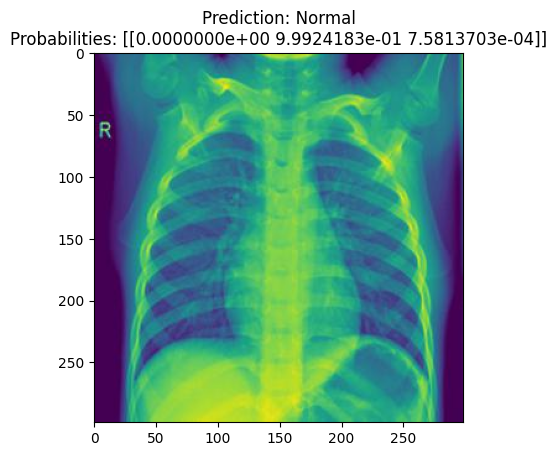

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

class_labels = ["Lung_Opacity", "Normal", "Viral Pneumonia"]

model = load_model('/content/lung_cancer_model.h5')

def preprocess_image(image_path, img_size=198):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (img_size, img_size))
    img = img.astype('float32') / 255.0  # Normalize pixel values
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

def test_image(image_path):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]
    return predicted_label, prediction

def display_result(image_path, prediction, predicted_label):
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Prediction: {predicted_label}\nProbabilities: {prediction}')
    plt.show()

uploaded_image_path = '/content/Normal/1087.jpg'
predicted_label, prediction = test_image(uploaded_image_path)
display_result(uploaded_image_path, prediction, predicted_label)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16928)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,166,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,186,693 (8.34 MB)

 Trainable params: 2,186,691 (8.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)